## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [198]:
#
# Your code to import matplotlib, pandas and numpy libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
#



Following code loads the CIFAR 10 datset.

In [199]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [200]:
#
# Your code to print shapes of training and test data. Check how the data looks
print("Training data shape:")
print(x_train.shape)
print(y_train.shape)

print("\nTest data shape:")
print(x_test.shape)
print(y_test.shape)
#

Training data shape:
(50000, 32, 32, 3)
(50000, 1)

Test data shape:
(10000, 32, 32, 3)
(10000, 1)


In [201]:
# Your code to print the shape of one image.
x_train[0].shape

(32, 32, 3)

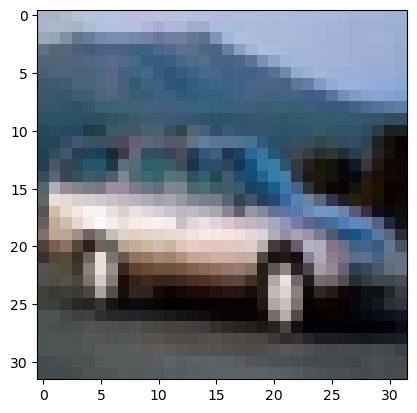

In [202]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
image = x_train[4]

plt.imshow(image)
plt.show()

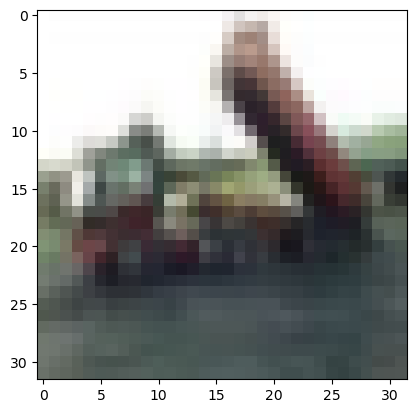

In [203]:
# Show any other image
image1 = x_train[2]
plt.imshow(image1)

# PreProcessing

In [204]:
# Your code to print one image in digitals. Check how pixels look like. 
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [205]:
# Your code to print shape of any image i.e particular value in the x_train
print(x_train[4].shape)

(32, 32, 3)


In [206]:
# Your code to print the maximum value in x_train. Hint - Use .max()
print(x_train[4].max())

254


In [207]:
x_train = x_train/255
x_test = x_test/255

In [208]:
# Print the shape of x_train again.
print(x_train[4].shape)

(32, 32, 3)


In [209]:
# Print the shape of y_train again.
print(y_train.shape)

(50000, 1)


# One hot vector encoding.
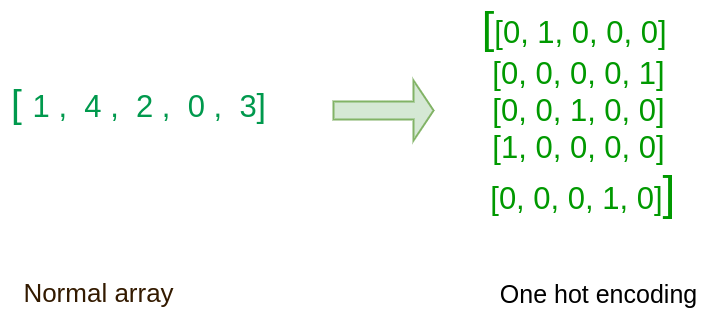


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [210]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
print(y_train[0].shape)

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train)


(1,)


In [211]:
# Your code to print shape of the array y_cat_train
print(y_cat_train.shape)

(50000, 10)


In [212]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.

index = 6

print(y_cat_train[index])

print(y_train[index])

# Compare the result for better understanding of "to_categorical()"



[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2]


In [213]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test)

# Print the shapes to look how y_cat_test looks.
print(y_cat_test.shape)


(10000, 10)


----------
# Building the Model

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [215]:
model = Sequential()

# Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# Pooling LAyer
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
# Convolution Layer
model.add(Conv2D(filters=16, kernel_size=(4,4), activation='relu',))
# Pooling LAyer
model.add(MaxPool2D(pool_size=(2, 2)))
#
model.add(Flatten())

#
# Add few dense layers. 
model.add(Dense(64, activation='relu'))
#
model.add(Dense(10, activation='softmax'))




In [216]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 16)        8208      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [217]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [218]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [219]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_cat_train,
                    
                    epochs=15,
                    
                    validation_data=(x_test, y_cat_test),
                    
                    callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5902 - accuracy: 0.4216 - val_loss: 1.3907 - val_accuracy: 0.4987
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3404 - accuracy: 0.5224 - val_loss: 1.2875 - val_accuracy: 0.5364
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2438 - accuracy: 0.5572 - val_loss: 1.2395 - val_accuracy: 0.5613
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1758 - accuracy: 0.5832 - val_loss: 1.1731 - val_accuracy: 0.5779
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1158 - accuracy: 0.6047 - val_loss: 1.1405 - val_accuracy: 0.5920
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0700 - accuracy: 0.6222 - val_loss: 1.0832 - val_accuracy: 0.6182
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0285 - accuracy: 0.6354 - val_loss: 1.1117 - val_ac

### We can save the model in a file. Following code shows how to do this.

In [220]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [221]:
losses = pd.DataFrame(model.history.history)

In [222]:
# Print first few rows of losses.
print(losses.head())

       loss  accuracy  val_loss  val_accuracy
0  1.590198   0.42164  1.390740        0.4987
1  1.340373   0.52244  1.287527        0.5364
2  1.243822   0.55722  1.239492        0.5613
3  1.175796   0.58324  1.173112        0.5779
4  1.115758   0.60474  1.140499        0.5920


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





<Axes: >

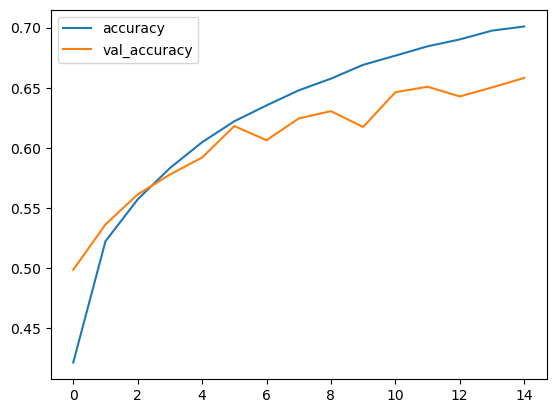

In [223]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
losses[['accuracy', 'val_accuracy']].plot()
# losses[['accuracy', 'val_accuracy']].plot()
#

<Axes: >

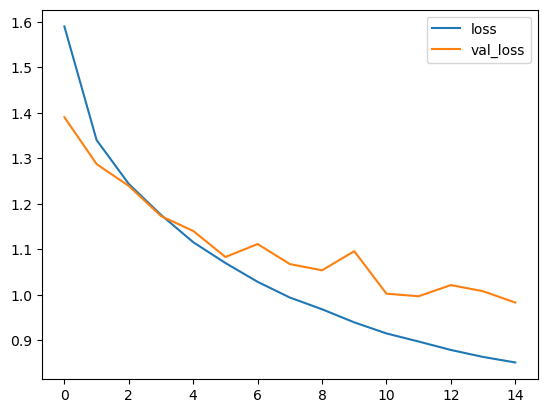

In [231]:
# 
# Your code to plot loss and val_loss vs the epochs
losses[['loss', 'val_loss']].plot()
#

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [232]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [233]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9829427003860474, 0.6582000255584717]

### Make a prediction on test data set.   

In [234]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 1s 3ms/step


### We could get the full classification report. 

In [235]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report


In [236]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.72      0.70      0.71      1000\n           1       0.78      0.72      0.75      1000\n           2       0.64      0.43      0.51      1000\n           3       0.47      0.48      0.47      1000\n           4       0.62      0.61      0.61      1000\n           5       0.50      0.62      0.56      1000\n           6       0.76      0.75      0.76      1000\n           7       0.71      0.71      0.71      1000\n           8       0.77      0.73      0.75      1000\n           9       0.66      0.82      0.73      1000\n\n    accuracy                           0.66     10000\n   macro avg       0.66      0.66      0.66     10000\nweighted avg       0.66      0.66      0.66     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [237]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix


In [238]:
confusion_matrix(y_test,predictions)

array([[700,  30,  35,  26,  21,  14,  11,  15,  81,  67],
       [ 34, 719,   4,  11,   2,   5,  11,   9,  31, 174],
       [ 69,  11, 429,  81, 119, 138,  68,  46,  22,  17],
       [ 18,  18,  48, 476,  64, 250,  50,  37,  16,  23],
       [ 23,   5,  43,  77, 614,  65,  47,  97,  24,   5],
       [ 11,   4,  37, 185,  43, 622,  19,  56,   9,  14],
       [  4,   8,  44,  71,  55,  35, 752,  13,   4,  14],
       [ 14,   3,  17,  49,  71,  84,  12, 715,   6,  29],
       [ 77,  58,   7,  18,   6,  12,   6,   7, 731,  78],
       [ 25,  63,   8,  16,   2,   9,  10,  16,  27, 824]], dtype=int64)

<Axes: >

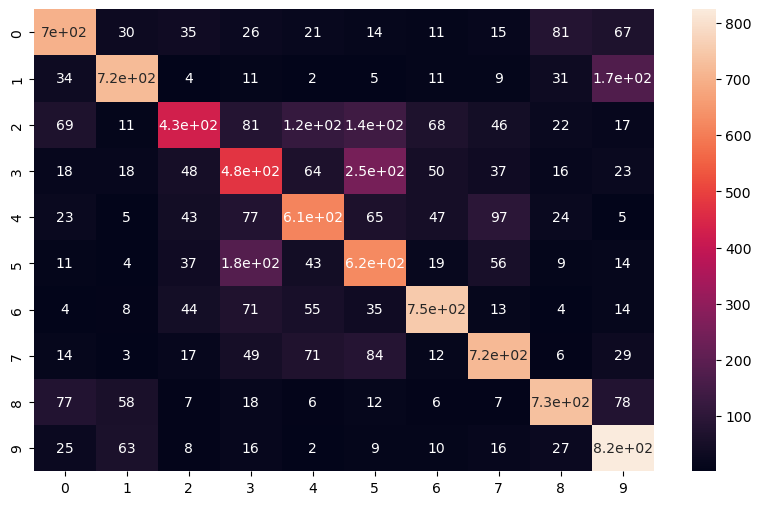

In [239]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [240]:
my_image = x_test[16]

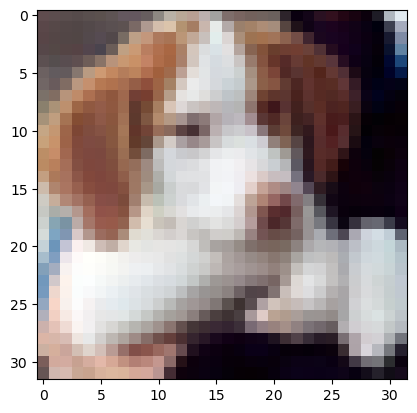

In [241]:
plt.imshow(my_image)

In [242]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 26ms/step


array([[3.2072267e-06, 1.3245042e-05, 5.9138332e-04, 7.0194758e-02,
        9.2912405e-06, 9.2819995e-01, 1.9907097e-04, 7.8559265e-04,
        2.5037814e-06, 1.0558573e-06]], dtype=float32)

In [249]:
# Find the highest probability value in the vector above. 
# What output value does it point to?


In [ ]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [ ]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 